<a href="https://colab.research.google.com/github/sunami20/Data-Science-2025/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Setting
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print(" All libraries imported successfully")

 All libraries imported successfully


# **2. Load Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/datasets/heart.csv')
print(" Dataset loaded successfully heart")
print(f'\n Dataset Shape: {df.shape}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dataset loaded successfully heart

 Dataset Shape: (1025, 14)


# **3. start assignment condition**

In [4]:

# Separate features and target
x = df.drop('target', axis=1)
y = df['target']

print(" Features (x):")
print(f" Shape: {x.shape}")
print(f" columns: {x.columns.tolist()}")

print('\n Target (y):')
print(f" Shape: {y.shape}")
print(f" Values: 0 (Age) and 1(Sex)")

 Features (x):
 Shape: (1025, 13)
 columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

 Target (y):
 Shape: (1025,)
 Values: 0 (Age) and 1(Sex)


In [5]:
# split into Training (80%) and Testing (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size = 0.2,
    random_state = 20
)

print(" Data Split: ")
print(f" Training {x_train.shape[0]} patients ({x_train.shape[0]/len(df)*100:.0f}%)")
print(f" Testing: {x_test.shape[0]} patients ({x_test.shape[0]/len(df)*100:.0f}%)")

 Data Split: 
 Training 820 patients (80%)
 Testing: 205 patients (20%)


In [6]:
# Feature Scaling (Important for KNN!)
print(" Scaling features.....\n")

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(" Feature scaling completed")

 Scaling features.....

 Feature scaling completed


# **3. Model is being Build **
# k- Nearest Neighbors (KNN) **bold text**

Best k: 1


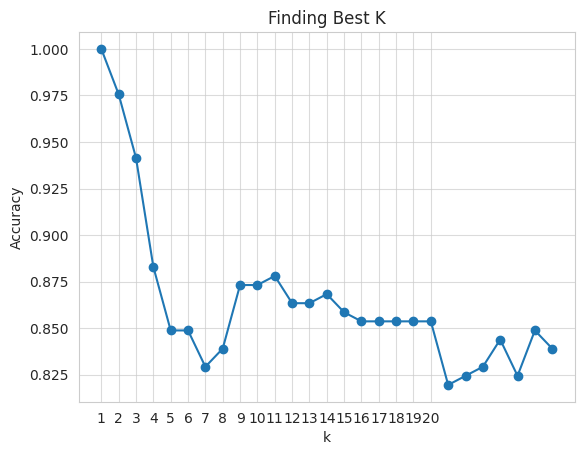

In [7]:
# Find Best k
accuracies = []

for k in range(1, 28):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_scaled, y_train)
  accuracies.append(accuracy_score(y_test, knn.predict(x_test_scaled)))

best_k = accuracies.index(max(accuracies)) + 1
print(f"Best k: {best_k}")


# Plot
plt.plot(range(1, 28), accuracies, marker ='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1,21)) # Corrected 'xlicks' to 'xticks'
plt.title('Finding Best K')
plt.grid(alpha=0.7)

plt.show()

In [8]:
# Train final KNN model
print(f"\n Training final KNN model with k = {best_k} ...\n")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train_scaled, y_train)
y_pred_knn = knn_model.predict(x_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(" KNN model trained! ")
print(f"\n KNN Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")


 Training final KNN model with k = 1 ...

 KNN model trained! 

 KNN Accuracy: 1.0000 (100.00%)


n KNN Classification Report: 
              precision    recall  f1-score   support

         Age       1.00      1.00      1.00        99
         Sex       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



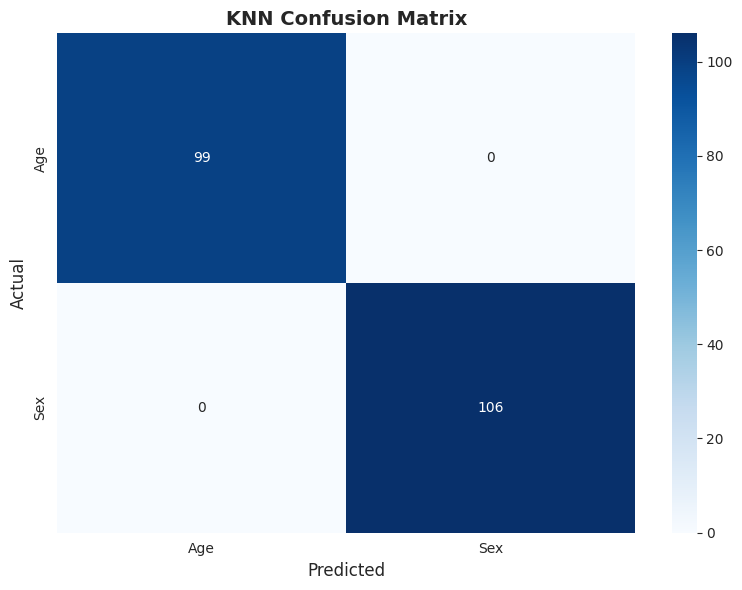

In [9]:
# Evaluation
print("n KNN Classification Report: ")
print("=" * 60)
print(classification_report(y_test, y_pred_knn, target_names=['Age', 'Sex']))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Age', 'Sex'],
            yticklabels=['Age', 'Sex'])

plt.title('KNN Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)

# **4. Model 2: Dicision Tree**

In [10]:
# Train Decision Tree
print(" Training Decision Tree....\n")

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=20,
    random_state=42
)

dt_model.fit(x_train, y_train) # No scaling needed
y_pred_dt = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(" Decision Tree Trainded!")
print(f"\n Decision Tree ACcuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f})%")

 Training Decision Tree....

 Decision Tree Trainded!

 Decision Tree ACcuracy: 0.7951 (79.51)%



 Deicison Tree Classification Report: 
              precision    recall  f1-score   support

         Age       0.75      0.87      0.80        99
         Sex       0.86      0.73      0.79       106

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.79       205
weighted avg       0.80      0.80      0.79       205



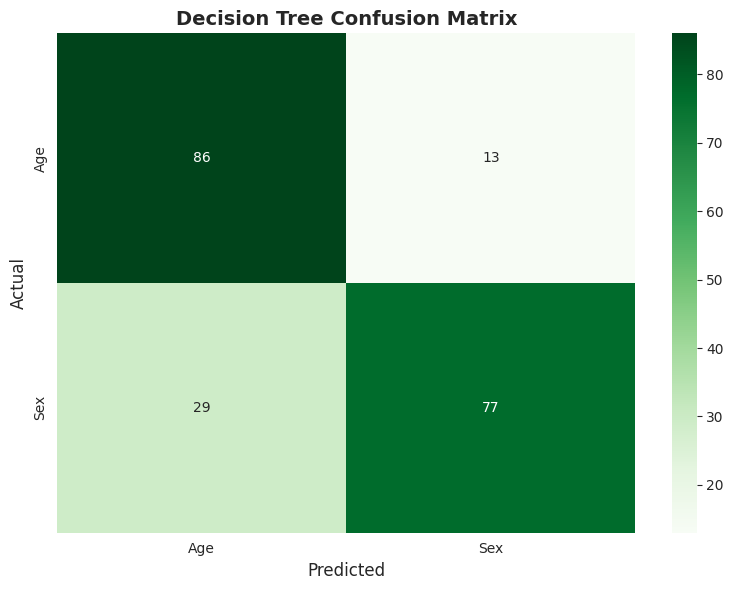

In [11]:
# Evaluation
print("\n Deicison Tree Classification Report: ")
print("="*60)
print(classification_report(y_test, y_pred_dt, target_names=['Age', 'Sex']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Age', 'Sex'],
            yticklabels=['Age', 'Sex'])
plt.title('Decision Tree Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)


 Feature Importance (Decision Tree): 
 Feature  Importance
      cp    0.437081
    thal    0.192399
      ca    0.177893
 oldpeak    0.050419
     age    0.045114
   exang    0.039924
   slope    0.034025
 thalach    0.022139
    chol    0.001007
trestbps    0.000000
     sex    0.000000
     fbs    0.000000
 restecg    0.000000


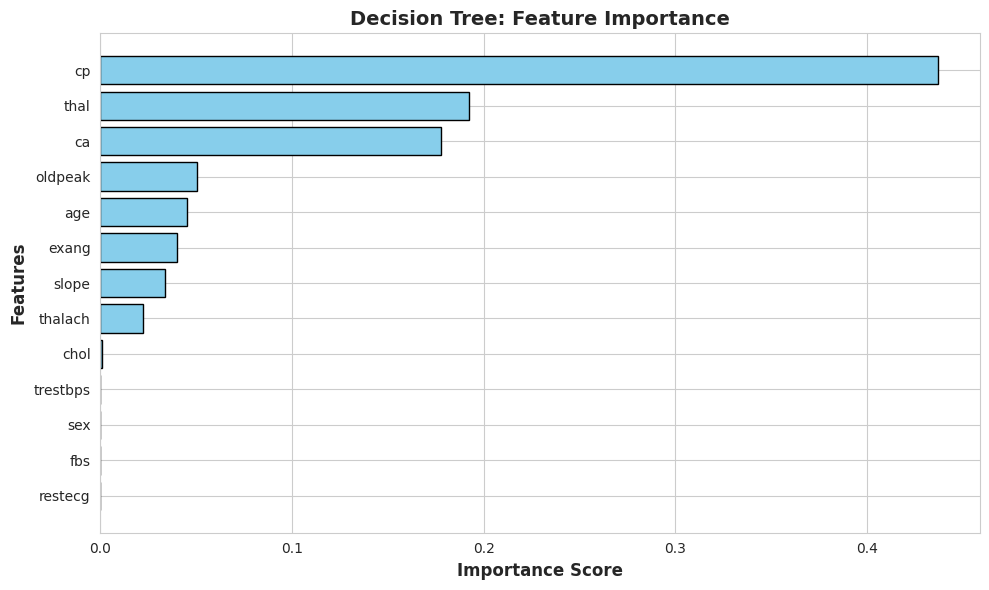


 These features are most importanct for predictional!



In [12]:
# Feature Importance
print("\n Feature Importance (Decision Tree): ")
print("=" * 60)

feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
          color='skyblue', edgecolor='black')

plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Decision Tree: Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print('\n These features are most importanct for predictional!')
print('\n' + '='*60)

# **5. Model 3: Random Forest**

In [13]:
# Train Random Forest
print(" Training Random Forest....\n")

rf_model = RandomForestClassifier(
    n_estimators =10,
    max_depth = 5,
    min_samples_split = 20,
    min_samples_leaf = 10,
    random_state = 42,
    n_jobs =-1
)

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(" Random Forest Trained! ")
print(f" {rf_model.n_estimators} tress created")
print(f" Each tree votes")
print(f"\n Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

 Training Random Forest....

 Random Forest Trained! 
 10 tress created
 Each tree votes

 Random Forest Accuracy: 0.8634 (86.34%)


n Random Forest Classification Report:
              precision    recall  f1-score   support

         Age       0.91      0.80      0.85        99
         Sex       0.83      0.92      0.88       106

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



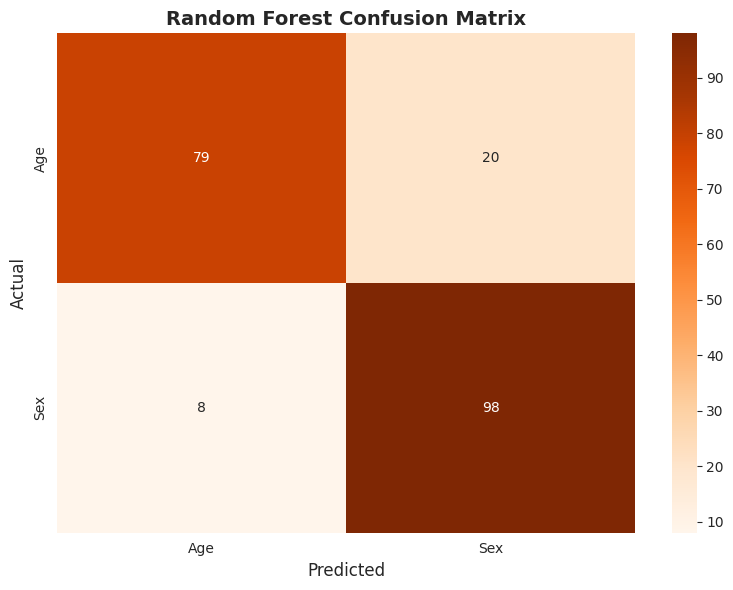

In [14]:
# Evaluation
print("n Random Forest Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_rf, target_names=['Age', 'Sex']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Age', 'Sex'],
            yticklabels=['Age', 'Sex'])
plt.title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)


 Feature Importance (Random Forest): 
 Feature  Importance
      ca    0.182276
    thal    0.160581
      cp    0.135952
 thalach    0.122976
   exang    0.115099
 oldpeak    0.074929
   slope    0.053317
     age    0.042948
    chol    0.039598
     sex    0.030589
trestbps    0.025743
 restecg    0.013407
     fbs    0.002584


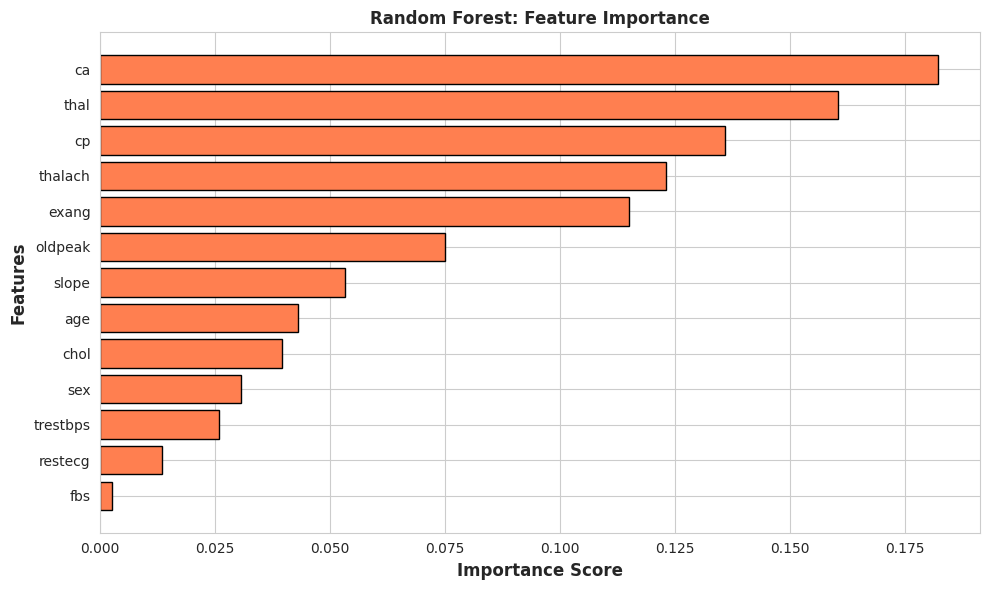


 Random Forest importance is more reliable!
 (Average of 100 tress)



In [17]:
# Feature Importance
print("\n Feature Importance (Random Forest): ")
print('='* 60)

rf_feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(rf_feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'],
         color = 'coral', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Random Forest: Feature Importance', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n Random Forest importance is more reliable!")
print(" (Average of 100 tress)")
print("\n" + "="*60)

# **6. Model Comparison & Final Result**

In [19]:
# Compaare all models
print("\n Final Model Comparision")
print("=" * 60)

comparision = pd.DataFrame({
    'Model' : ['KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy' : [knn_accuracy, dt_accuracy, rf_accuracy],
    'Accuracy %' : [f"{knn_accuracy*100:.2f}%", f"{dt_accuracy*100:.2f}%", f"{rf_accuracy*100:.2f}%"]
})

comparison = comparision.sort_values('Accuracy', ascending=False)
print('\n' + comparison.to_string(index=False))

best_model = comparison.iloc[0]['Model']
best_acc = comparison.iloc[0] ['Accuracy']

print(f"\n Winner: {best_model}")
print(f" Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
print("\n" + "="*60)


 Final Model Comparision

        Model  Accuracy Accuracy %
          KNN  1.000000    100.00%
Random Forest  0.863415     86.34%
Decision Tree  0.795122     79.51%

 Winner: KNN
 Accuracy: 1.0000 (100.00%)



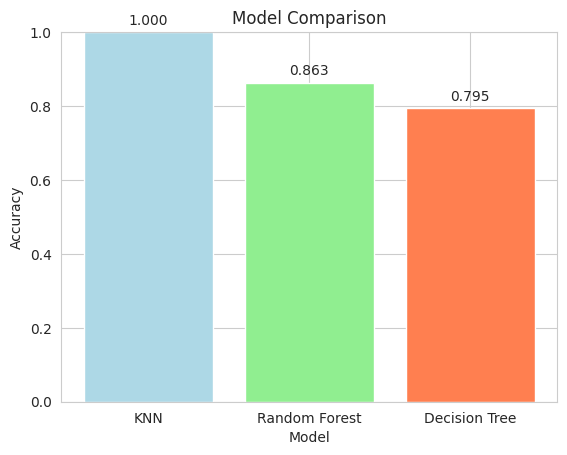

In [21]:
# Visuapl Comparison
plt.bar(comparison['Model'], comparison['Accuracy'], color=['lightblue', 'lightgreen', 'coral'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0, 1])

# Add values on bars
for i, acc in enumerate(comparison['Accuracy']):
  plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center')

plt.show()